In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("height-weight.csv")

# take a look at the dataset
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
cdf = df[['Height','Weight']]
cdf.head(9)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440


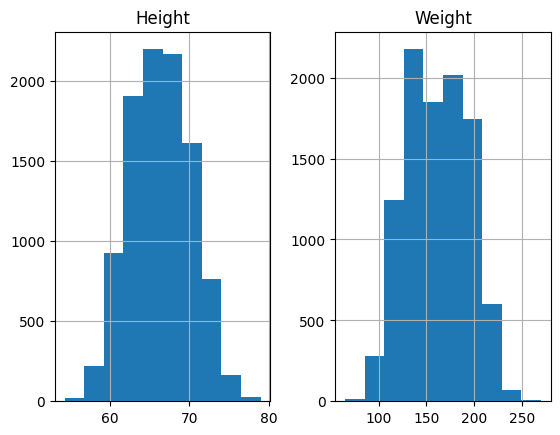

In [5]:
viz = cdf[['Height','Weight']]
viz.hist()
plt.show()

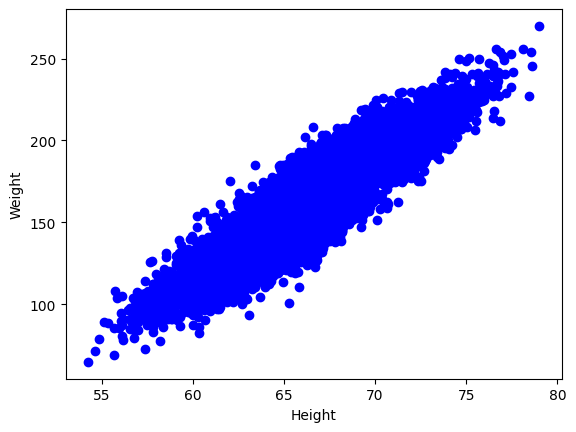

In [6]:
plt.scatter(cdf.Height, cdf.Weight,  color='blue')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [37]:
msk = np.random.rand(len(df)) < 0.80
train = cdf[msk]
test = cdf[~msk]
print(msk)
print(train)

[False  True  True ...  True  True False]
         Height      Weight
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
5     67.253016  152.212156
...         ...         ...
9994  59.098250  110.529686
9995  66.172652  136.777454
9996  67.067155  170.867906
9997  63.867992  128.475319
9998  69.034243  163.852461

[7932 rows x 2 columns]


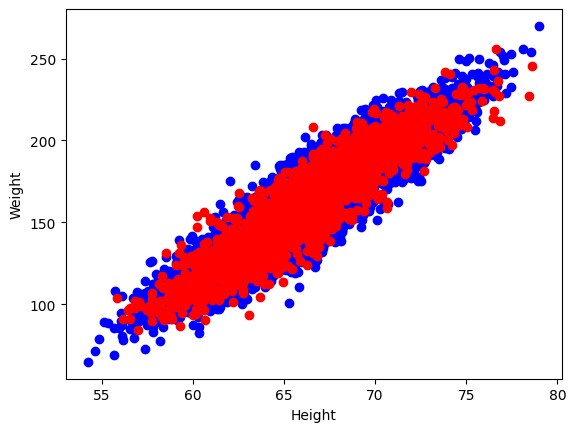

In [38]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Height, train.Weight,  color='blue')
ax1.scatter(test.Height, test.Weight,  color='red')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [39]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Height']])
train_y = np.asanyarray(train[['Weight']])

regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[7.74556213]]
Intercept:  [-352.66212089]


Text(0, 0.5, 'Weight')

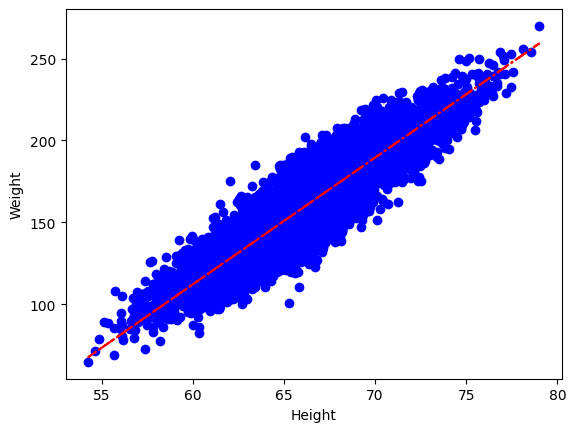

In [40]:
plt.scatter(train.Height, train.Weight,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-.r')
plt.xlabel("Height")
plt.ylabel("Weight")

In [42]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Height']])
test_y = np.asanyarray(test[['Weight']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 9.82
Residual sum of squares (MSE): 151.85
R2-score: 0.85
